In [3]:
install.packages(c("dplyr","ggplot2","zoo","forecast"))
library(dplyr)
library(ggplot2)
library(zoo)
library(forecast)

also installing the dependencies ‘quadprog’, ‘Rcpp’, ‘rlang’, ‘fracdiff’, ‘lmtest’, ‘tseries’, ‘urca’, ‘uroot’, ‘RcppArmadillo’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


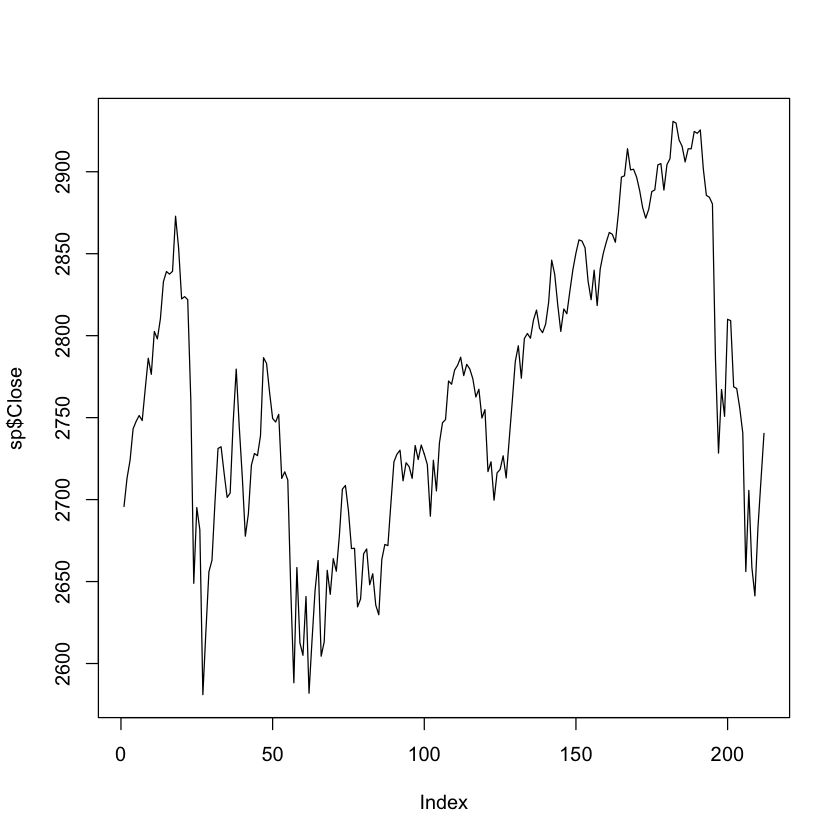

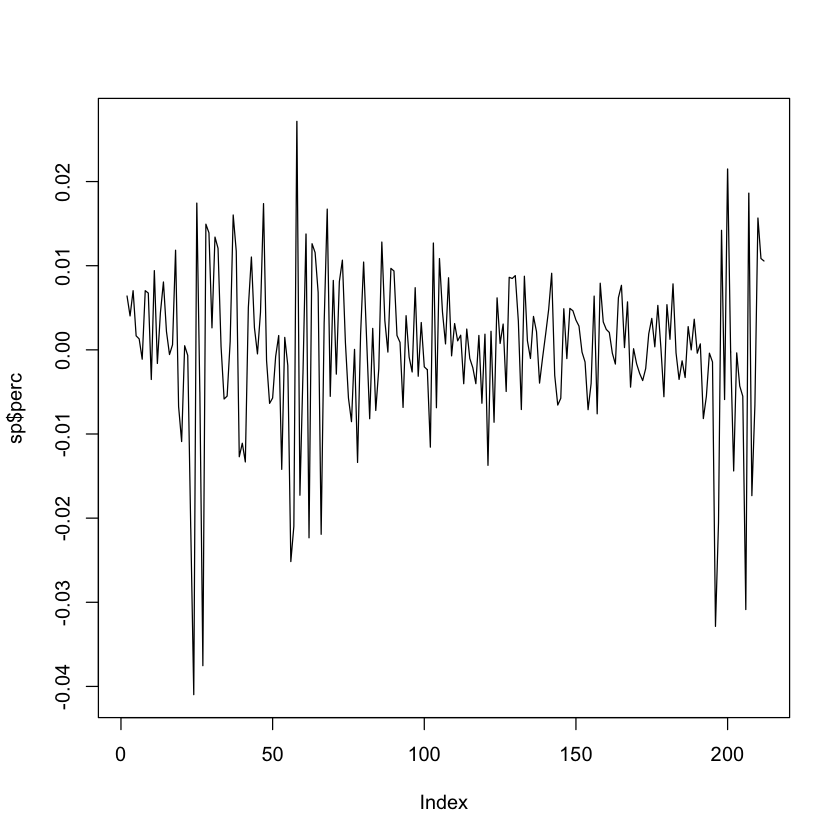

In [4]:
sp <- read.csv("GSPC.csv")
plot(sp$Close, type ="l")

#Calculate Percentage Change
sp <- sp %>%
  mutate(perc = (Close - lag(Close))/lag(Close), Date = as.Date(Date))

#Percentage Change from Day-Day
plot(sp$perc, type = "l")

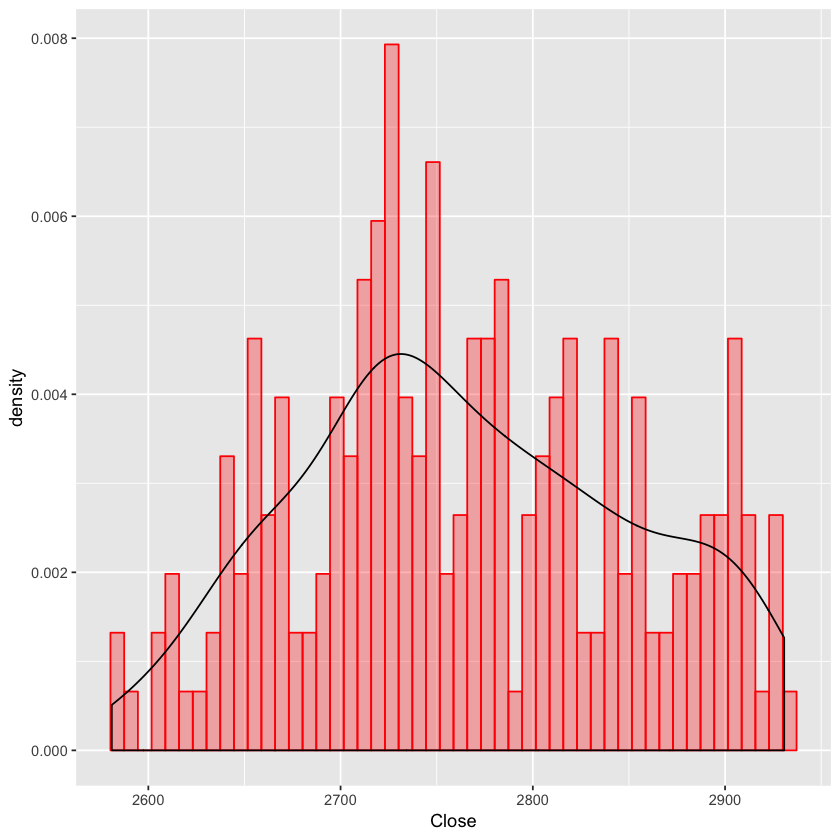

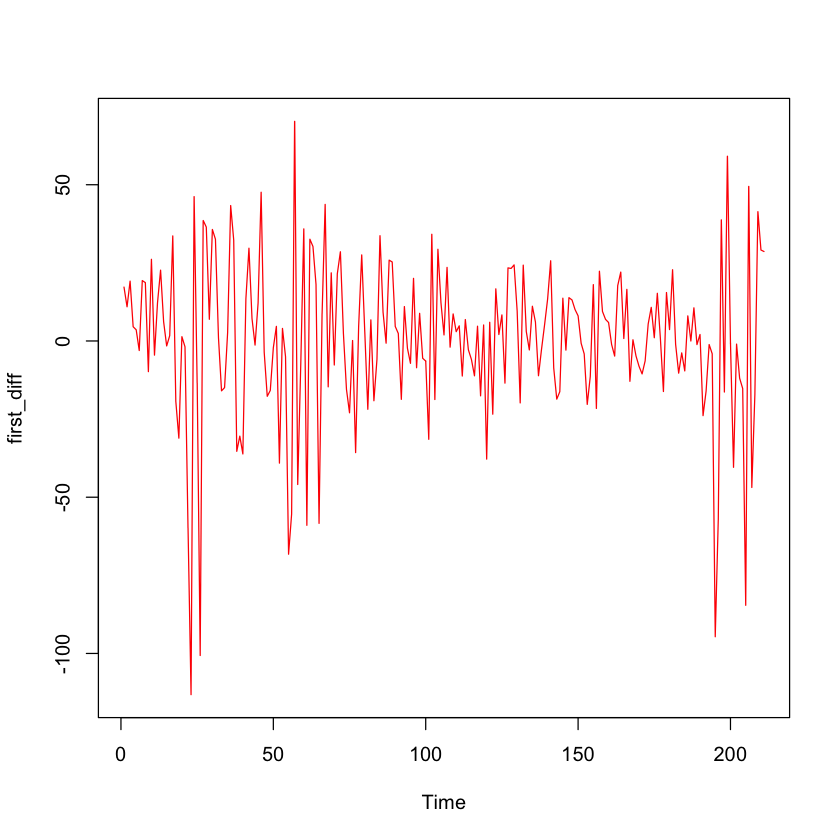

In [5]:
#Density Plot of prices
ggplot(sp, aes(Close)) + 
  geom_histogram(bins = 50, aes(y = ..density..), col = "red", fill = "red", alpha = 0.3) + geom_density()

#First Difference
first_diff <- diff(sp$Close, differences=1)
plot.ts(first_diff, col = "red")

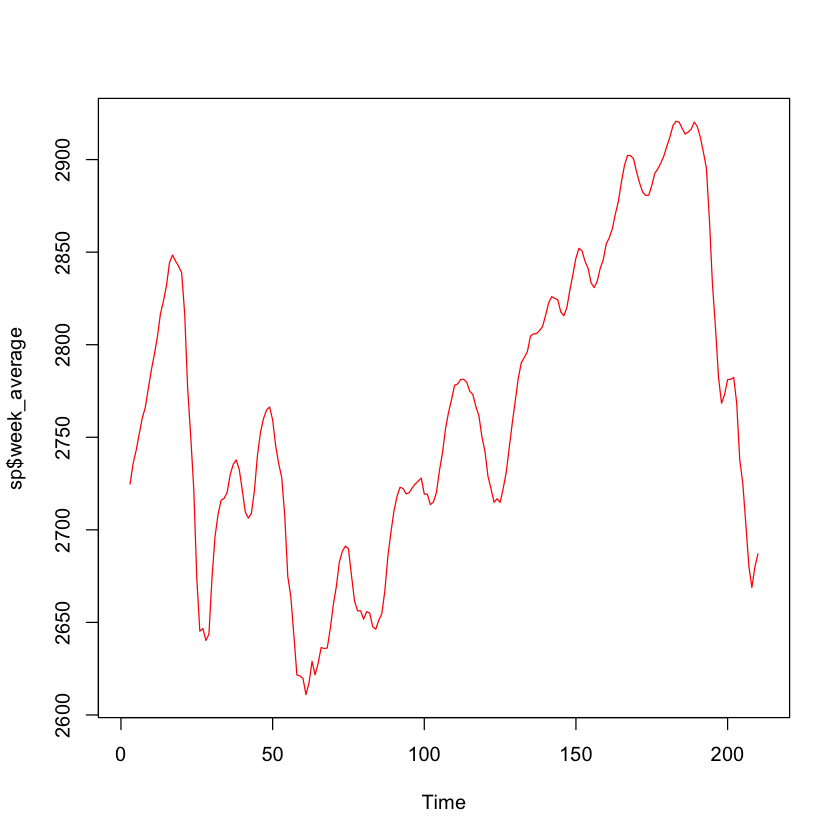

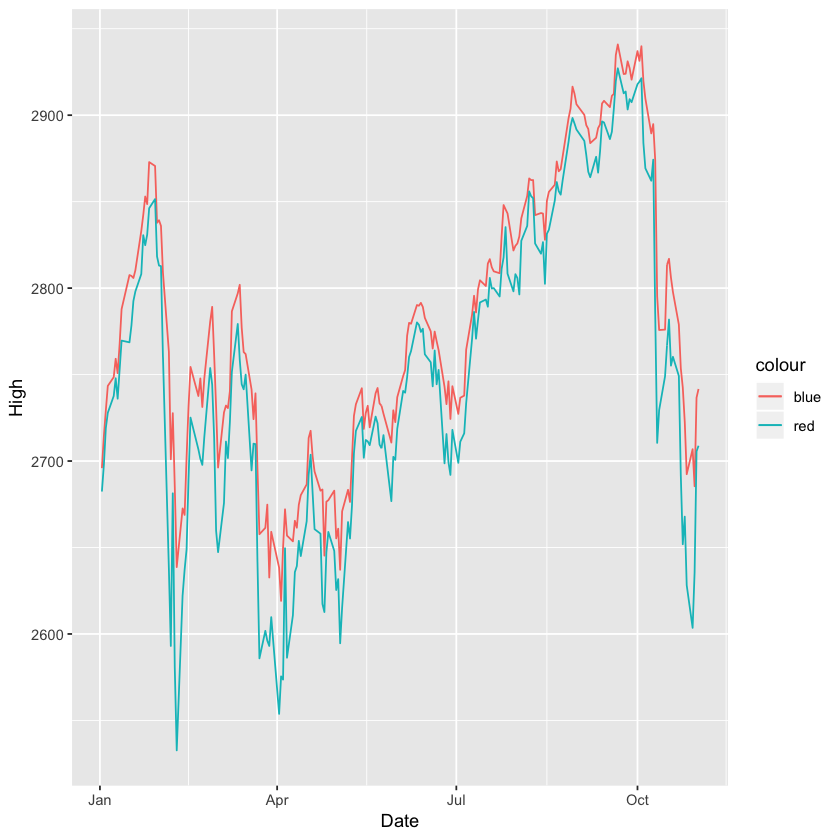

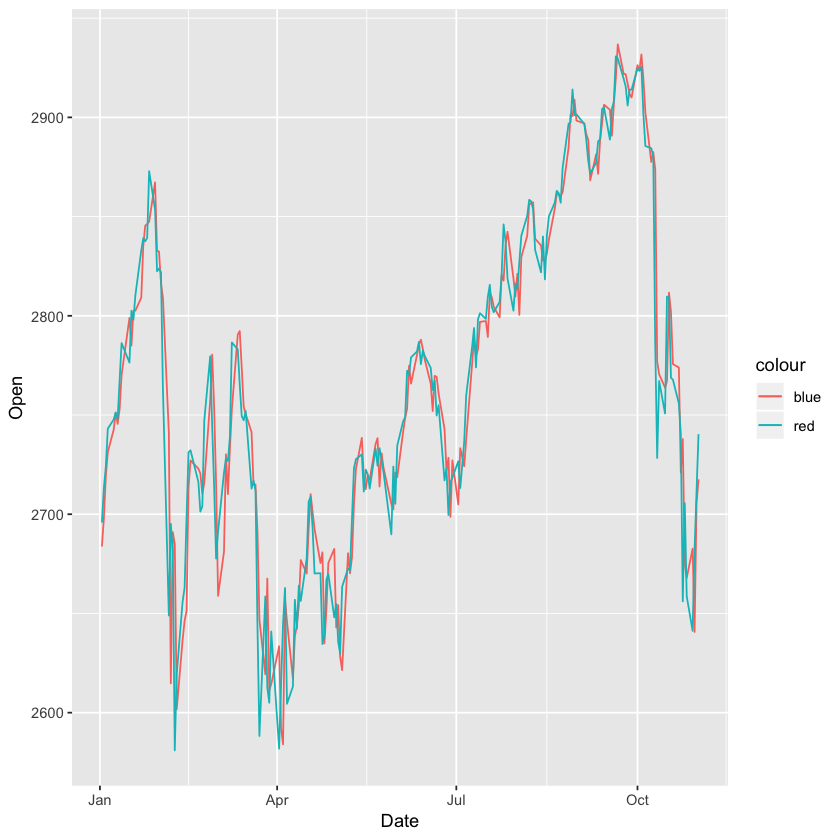

In [6]:
#Moving Average

sp <- sp %>%
  mutate(week_average = rollmean(Close, k = 5, fill = NA))

# This is done to smoothen the data a little bit
plot.ts(sp$week_average, col = "red")



ggplot(sp) +
  geom_line(aes(x=Date,y=High,colour="blue")) +
  geom_line(aes(x=Date,y=Low,colour="red")) 

ggplot(sp) +
  geom_line(aes(x=Date,y=Open,colour="blue")) +
  geom_line(aes(x=Date,y=Close,colour="red")) 